In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
food=pd.read_csv('datasets1/africa_food_prices.csv')

# DATA UNDERSTANDING

In [3]:
# investigate the datasets by checking through all of the value inputed
# to check if theres need for cleaning and preparation
food.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [4]:
food.dtypes

Unnamed: 0              int64
country_id            float64
country                object
state_id                int64
state                  object
market_id               int64
market                 object
produce_id              int64
produce                object
currency_id           float64
currency               object
pt_id                   int64
market_type            object
um_unit_id              int64
quantity               object
month                   int64
year                    int64
price                 float64
mp_commoditysource    float64
dtype: object

In [5]:
food.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [6]:
food.describe()

,Unnamed: 0,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price,mp_commoditysource
count,9.567790e+05,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05,0.0
mean,1.076345e+06,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03,NaN
std,5.159597e+05,10404.034922,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05,NaN
min,1.542700e+04,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00,NaN
25%,5.939185e+05,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01,NaN
50%,1.113054e+06,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02,NaN
75%,1.513290e+06,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02,NaN
max,2.050637e+06,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07,NaN


# DATA PREPARATION AND CLEANING

In [7]:
food.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [8]:
food.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [9]:
# drop the subsets int the column you dont need for future visualization
food.drop(columns=['Unnamed: 0','mp_commoditysource','currency_id'], inplace = True)

In [10]:
food.head()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0


In [11]:
food.columns

Index(['country_id', 'country', 'state_id', 'state', 'market_id', 'market',
       'produce_id', 'produce', 'currency', 'pt_id', 'market_type',
       'um_unit_id', 'quantity', 'month', 'year', 'price'],
      dtype='object')

In [12]:
selected_columns=['country_id', 'country', 'state_id', 'state', 'market_id', 'market',
       'produce_id', 'produce', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price']

In [13]:
len(selected_columns)

16

In [14]:
food.shape

(956779, 16)

In [15]:
food=food.copy()

In [16]:
food.dtypes

country_id     float64
country         object
state_id         int64
state           object
market_id        int64
market          object
produce_id       int64
produce         object
currency        object
pt_id            int64
market_type     object
um_unit_id       int64
quantity        object
month            int64
year             int64
price          float64
dtype: object

In [17]:
# rename the columns
food=food.rename(columns={'country_id':'Country_ID','country':'Country','state_id':'State_ID',
                    'state':'State','market_id':'Market_ID','market':'Market','produce_id':'Produce_ID',
                    'produce':'Produce', 'currency':'Currency',
                    'pt_id ':'PT_ID','market_type':'Market_Type','um_unit_id':'Um_Unit_ID',
                     'quantity':'Quantity','month':'Month','year':'Year','price':'Price'})



In [18]:
food

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0000
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0000
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0000
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0000
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,ZWL,15,Retail,5,KG,6,2021,233.3333
956775,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,ZWL,15,Retail,116,100 ML,6,2021,112.5000
956776,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,ZWL,15,Retail,5,KG,6,2021,114.0000
956777,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,ZWL,15,Retail,66,250 G,6,2021,59.5000


In [19]:
# The state column contains nulll values 
# I will then take care of the null values
food[food['State'].isnull()]
# The syntax helps to locate the nan values in the datasets
state_null = food[food['State'].isnull()]
state_null

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price
140847,50.0,Chad,0,NaN,1965,National Average,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,11,2018,567.0
140848,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,10,2018,191.0
140849,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,11,2018,175.0
140850,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,10,2018,172.0
140851,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,11,2018,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889628,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,5,2020,23.0
889629,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,6,2020,22.5
889630,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,7,2020,22.5
889631,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,8,2020,22.5


In [20]:
# investigate all the state_id unique values
state_null['State_ID'].value_counts().head(50)

# the state id data starts from the 0

0        8302
2114     5708
1850     5427
2122     5339
2120     5164
2121     4776
2118     4498
2115     4017
2112     3462
2113     3312
2119     3002
2116     2998
2747     2850
12912    2480
1844     2398
1843     2377
1845     2307
12918    2280
37021    2127
2748     2114
2746     1993
2766     1944
1842     1915
1838     1817
2754     1792
1834     1727
2783     1657
2750     1406
1836     1337
1846     1336
2751     1307
12915    1269
12927    1243
1837     1242
1851     1209
1832     1195
1849     1194
1847     1182
1839     1174
1835     1133
1833     1130
1840     1114
1841     1099
1848     1092
1829     1091
870      1074
881      1073
1830     1056
2765     1050
2768     1045
Name: State_ID, dtype: int64

In [21]:
# where state id equals 0
state_null[state_null['State_ID'] == 0]

# brings out the state market with the nan values
state_null[state_null['State_ID'] == 0]['Market'].value_counts()

National Average    3446
Nalut               1328
Azzintan            1223
Ghat                1212
AlMarj              1093
Name: Market, dtype: int64

In [22]:
food.loc[food['Market'] == 'National Average', 'State'] = food.loc[food['Market'] == 'National Average', 'State'].fillna(value='National Average')

In [23]:
# Note this method is stressful and it takes a lot of time
# I will investigate further by using the simplest method to solve the data 
food[food['Market'] == 'National Average']

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price
140847,50.0,Chad,0,National Average,1965,National Average,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,11,2018,567.00
140848,50.0,Chad,0,National Average,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,10,2018,191.00
140849,50.0,Chad,0,National Average,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,11,2018,175.00
140850,50.0,Chad,0,National Average,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,10,2018,172.00
140851,50.0,Chad,0,National Average,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,11,2018,147.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886313,235.0,Swaziland,0,National Average,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,9,2019,23.13
886314,235.0,Swaziland,0,National Average,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,10,2019,23.13
886315,235.0,Swaziland,0,National Average,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,11,2019,23.88
886316,235.0,Swaziland,0,National Average,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,12,2019,23.13


In [24]:
food.loc[food['Market'] == 'Nalut', 'State'] = food.loc[food['Market'] == 'Nalut', 'State'].fillna(value='Nalut')

In [25]:
food.loc[food['Market'] == 'Azzintan', 'State'] = food.loc[food['Market'] == 'Azzintan', 'State'].fillna(value='Azzintan')

In [26]:
food.loc[food['Market'] == 'Ghat', 'State'] = food.loc[food['Market'] == 'Ghat', 'State'].fillna(value='Ghat')

In [27]:
food.loc[food['Market'] == 'AlMarj', 'State'] = food.loc[food['Market'] == 'AlMarj', 'State'].fillna(value='AlMarj')

In [28]:
# verify if the state id in the state subset is filled 
state_null = food[food['State'].isnull()]
state_null['State_ID'].value_counts() 

2114     5708
1850     5427
2122     5339
2120     5164
2121     4776
         ... 
12924     270
12920     246
12905     246
12908       3
12907       2
Name: State_ID, Length: 71, dtype: int64

In [29]:
mozambique_null = state_null[state_null['Country'] == 'Mozambique']
mozambique_null['Market'].value_counts()

Nampula                2598
Maputo                 2580
Manica                 2294
Gorongoza              2061
Chokwe                 1935
Angónia                1808
Lichinga               1750
Beira                  1690
Pemba                  1683
Maxixe                 1675
Tete                   1590
Mocuba                 1572
Montepuez              1529
Chimoio                1468
Quelimane              1454
Massinga               1445
Inhambane              1426
Alto Molócuè           1355
Ribaue                 1298
Mutarara               1281
Nhamatanda             1188
Xai Xai                1170
Cuamba                  985
Milange                 958
Nacala                  432
Govuro                  188
Caia                    180
Panda                   169
Mandimba                169
Chibuto                 168
Namaacha                167
Gondola                 163
Vilanculos              156
Morrumbene              146
Inhassoro               138
Mabote              

In [30]:
mozambique_fill = {
             'Nampula':'Nampula',                
             'Maputo':'Maputo',                 
             'Manica':'Manica',                 
             'Gorongoza':'Gorongoza',             
             'Chokwe':'Chokwe',                 
             'Angónia':'Angónia',                
             'Lichinga':'Lichinga',               
             'Beira':'Beira',                  
             'Pemba':'Pemba',                  
             'Maxixe':'Maxixe',                 
                    'Tete':'Tete',                   
                    'Mocuba':'Mocuba',                                  
                    'Montepuez':'Montepuez',              
                    'Chimoio':'Chimoio',                
                    'Quelimane':'Quelimane',              
                    'Massinga':'Massinga',               
                    'Inhambane':'Inhambane',              
                    'Alto Molócuè':'Alto Molócuè',           
                    'Ribaue':'Ribaue',                 
                    'Mutarara':'Mutarara',               
                    'Nhamatanda':'Nhamatanda',             
                    'Xai Xai':'Xai Xai',                
                    'Cuamba':'Cuamba',                  
                    'Milange':'Milange',                 
                    'Nacala':'Nacala',                  
                    'Govuro':'Govuro',                  
                    'Caia':'Caia',                    
                    'Panda':'Panda',                   
                    'Mandimba':'Mandimba',                
                    'Chibuto':'Chibuto',                 
                    'Namaacha':'Namaacha',                
                    'Gondola':'Gondola',                
                    'Vilanculos':'Vilanculos',              
                    'Morrumbene':'Morrumbene',             
                    'Inhassoro':'mozambique',               
                    'Mabote':'Mabote',              
                    'Balama':'Balama',                  
                    'Namuno':'Namuno',                  
                    'Murrupula':'Murrupula',              
                    'Inharrime':'Inharrime',              
                    'Funhalouro':'Funhalouro',              
                    'Macanga':'Macanga',               
                    'Changara':'Changara',                
                    'Báruè':'Báruè',                 
                    'Moamba':'Moamba',                
                    'Boane':'Boane',                   
                    'Malema':'Malema',                  
                    'Buzi':'Buzi',                    
                    'Manhica':'Manhica',                
                    'Chicualacuala Mapai':'Chicualacuala Mapai',   
                    'Bela Vista':'Bela Vista',            
                    'Cidade da Matola':'Cidade da Matola' 
}

In [31]:
# The syntax below operates in such a way that the apply() syntax helps to wrap the lambda syntax
# to collect or get the fill values which is determined or equate by using the dictionary format
# and you state the argument in other to wrap the syntax all together
food['State'] = food.apply(lambda row: mozambique_fill.get(row['Market']) if pd.isna(row['State']) else row['State'], axis=1)


In [32]:
# Use the state id to locate the country before fixing or filling the missing values
#state_null[state_null['State_ID'] == 1850]
libya_null = state_null[state_null['Country'] == 'Libya']
libya_null['Market'].value_counts()

Brak              1337
Sebha             1336
Zliten            1267
Ubari             1242
Tobruk            1209
Algatroun         1209
Ghiryan           1199
Albayda           1195
Tarhuna           1194
Bani Waleed       1182
Zwara             1179
Benghazi          1174
Suq Aljumaa       1137
Abusliem          1135
Alkufra           1133
Aljufra           1130
Sabratha          1128
Derna             1114
Azzawya           1113
Misrata           1110
Ghadamis          1099
Sirt              1092
Ejdabia           1091
Al Aziziya        1056
Alkhums           1010
Tripoli center     858
Hai Alandalus      845
Yefren             750
Tajoura            743
Msallata           717
Ashshgega          716
Ain Zara           709
Janzour            704
Murzuq             610
Wadi Etba          579
Name: Market, dtype: int64

In [33]:
libya_fill = {
'Brak':'Brak',          
'Sebha':'Sebha',             
'Zliten':'Zliten',            
'Ubari':'Ubari',             
'Tobruk':'Tobruk',            
'Algatroun':'Algatroun',         
'Ghiryan':'Ghiryan',           
'Albayda':'Albayda',           
'Tarhuna':'Tarhuna',           
'Bani Waleed':'Bani Waleed',       
'Zwara':'Zwara',             
'Benghazi':'Benghazi',          
'Suq Aljumaa':'Suq Aljumaa',       
'Abusliem':'Abusliem',          
'Alkufra':'Alkufra',           
'Aljufra':'Aljufra',           
'Sabratha':'Sabratha',          
'Derna':'Derna',             
'Azzawya':'Azzawya',           
'Misrata':'Misrata',           
'Ghadamis':'Ghadamis',          
'Sirt':'Sirt',              
'Ejdabia':'Ejdabia',           
'Al Aziziya':'Al Aziziya',        
'Alkhums':'Alkhums',           
'Tripoli center':'Tripoli center',     
'Hai Alandalus':'Hai Alandalus',      
'Yefren':'Yefren',             
'Tajoura':'Tajoura',            
'Msallata':'Msallata',           
'Ashshgega':'Ashshgega',          
'Ain Zara':'Ain Zara',           
'Janzour':'Janzour',            
'Murzuq':'Murzuq',             
'Wadi Etba':'Wadi Etba' 
}

In [34]:
food['State'] = food.apply(lambda row: libya_fill.get(row['Market']) if pd.isna(row['State']) else row['State'], axis=1)


In [35]:
# Use the state id to locate the country before fixing or filling the missing values
# state_null[state_null['State_ID'] == 2747]

south_sudan_null = state_null[state_null['Country'] == 'South Sudan']
south_sudan_null['Market'].value_counts()

Konyokonyo       2114
Jau              1944
Aweil Town       1792
Bor              1286
Rumbek           1284
Malakal          1050
Bentiu            983
Torit             972
Kuajok            936
Yida              898
Minkaman          709
Yambio            708
Aniet             490
Rubkona           479
Bunj              479
Kapoeta South     434
Makpandu          337
Melut             329
Suk Shabi         269
Wunrok            114
Akobo              21
Name: Market, dtype: int64

In [36]:
south_sudan_fill = {
'Konyokonyo':'Konyokonyo',   
'Jau':'Jau',              
'Aweil Town':'Aweil Town',       
'Bor':'Bor',              
'Rumbek':'Rumbek',           
'Malakal':'Malakal',          
'Bentiu':'Bentiu',           
'Torit':'Torit',            
'Kuajok':'Kuajok',           
'Yida':'Yida',             
'Minkaman':'Minkaman',         
'Yambio':'Yambio',           
'Aniet':'Aniet',            
'Rubkona':'Rubkona',          
'Bunj':'Bunj',             
'Kapoeta South':'Kapoeta South',    
'Makpandu':'Makpandu',         
'Melut':'Melut',            
'Suk Shabi':'Suk Shabi',        
'Wunrok':'Wunrok',           
'Akobo':'Akobo'
}    

In [37]:
food['State'] = food.apply(lambda row: south_sudan_fill.get(row['Market']) if pd.isna(row['State']) else row['State'], axis=1)

In [38]:
# check for the remaining nan values
# state_null = food[food['State'].isnull()]
# state_null['State_ID'].value_counts()
# to check the country name with the missing values
# state_null[state_null['State_ID']==12912]
chad_null = state_null[state_null['Country'] == 'Chad']
chad_null['Market'].value_counts()

Ndjamena             1644
Moussoro              887
Moundou               836
Abeche                830
Sarh                  760
Mongo                 646
Mao                   616
Am Timan              587
Bol                   586
Oum Hadjer            489
Aboudeia              437
Bousso                416
Abdi                  413
Gore                  406
Bokoro                405
Iriba                 400
Goz Beida             380
Massakory             358
Amdam                 355
Biltine               334
Laï                   320
Mandelia              313
Bongor                305
Kélo                  303
Ngouri                296
Peni                  280
Nokou                 271
Benoye                271
Kyabe                 270
Mbaïbokoum            261
Mbaïnamar             260
Gueledeng             247
Fianga                246
Maro                  243
Moissala              237
Pala                  225
Koumra                212
Doba                  209
Beboto      

In [39]:
chad_fill = {
    'Ndjamena':'Ndjamena',          
'Moussoro':'Moussoro',              
'Moundou':'Moundou',               
'Abeche':'Abeche',                
'Sarh':'Sarh',                  
'Mongo':'Mongo',               
'Mao':'Mao',                  
'Am Timan':'Am Timan',             
'Bol':'Bol',                  
'Oum Hadjer':'Oum Hadjer',           
'Aboudeia':'Aboudeia',             
'Bousso':'Bousso',               
'Abdi':'Abdi',                 
'Gore':'Gore',                 
'Bokoro':'Bokoro',               
'Iriba':'Iriba',                
'Goz Beida':'Goz Beida',            
'Massakory':'Massakory',            
'Amdam':'Amdam',                
'Biltine':'Biltine',              
'Laï':'Laï',                  
'Mandelia':'Mandelia',             
'Bongor':'Bongor',               
'Kélo':'Kélo',                 
'Ngouri':'Ngouri',               
'Peni':'Peni',                 
'Nokou':'Nokou',                 
'Benoye':'Benoye',                
'Kyabe':'Kyabe',                 
'Mbaïbokoum':'Mbaïbokoum',            
'Mbaïnamar':'Mbaïnamar',             
'Gueledeng':'Gueledeng',             
'Fianga':'Fianga',                
'Maro':'Maro',                  
'Moissala':'Moissala',              
'Pala':'Pala',                  
'Koumra':'Koumra',                
'Doba':'Doba',                  
'Beboto':'Beboto',                
'Lere':'Lere',                  
'Krim Krim':'Krim Krim',             
'Ati':'Ati',                   
'Bodo':'Bodo',                  
'Bebedja':'Bebedja',               
'Guereda':'Guereda',               
'Massenya':'Massenya',              
'Massaguet':'Massaguet',             
'Am-Zoer':'Am-Zoer',               
'Melfi':'Melfi',                 
'Mondo':'Mondo',                  
'Yao':'Yao',                    
'Bitkine':'Bitkine',                
'Mangalme':'Mangalme',               
'Haraze Mangueigne':'Haraze Mangueigne',      
'Oumhadjer':'Oumhadjer',               
'Amdjarass':'Amdjarass',               
'Faya':'Faya'
}

In [40]:
food['State'] = food.apply(lambda row: chad_fill.get(row['Market']) if pd.isna(row['State']) else row['State'], axis=1)

In [41]:
# check for the remaining nan values
# state_null = food[food['State'].isnull()]
# state_null['State_ID'].value_counts()
# to check the country name with the missing values
# state_null[state_null['State_ID']==2783]
# locate the country name
swaziland_null = state_null[state_null['Country'] == 'Swaziland']
swaziland_null['Market'].value_counts()

Hhohho        829
Shiselweni    829
Manzini       829
Lubombo       828
Name: Market, dtype: int64

In [42]:
swaziland_fill = {
    'Hhohho':'Hhohho',    
'Shiselweni':'Shiselweni',    
'Manzini':'Manzini',       
'Lubombo':'Lubombo'
}
    

In [43]:
food['State'] = food.apply(lambda row: swaziland_fill.get(row['Market']) if pd.isna(row['State']) else row['State'], axis=1)

## I have succesfully get rid of the missing values in the datasets
## We can hereby proceeds and start visualizing
### verify by using the following food.isna().sum()

In [44]:
# check for missing values
food.isna().sum()

Country_ID     0
Country        0
State_ID       0
State          0
Market_ID      0
Market         0
Produce_ID     0
Produce        0
Currency       0
pt_id          0
Market_Type    0
Um_Unit_ID     0
Quantity       0
Month          0
Year           0
Price          0
dtype: int64

In [45]:
food.isna().any()

Country_ID     False
Country        False
State_ID       False
State          False
Market_ID      False
Market         False
Produce_ID     False
Produce        False
Currency       False
pt_id          False
Market_Type    False
Um_Unit_ID     False
Quantity       False
Month          False
Year           False
Price          False
dtype: bool

In [46]:
# to verify the syntax
food.isna().any()

Country_ID     False
Country        False
State_ID       False
State          False
Market_ID      False
Market         False
Produce_ID     False
Produce        False
Currency       False
pt_id          False
Market_Type    False
Um_Unit_ID     False
Quantity       False
Month          False
Year           False
Price          False
dtype: bool

In [47]:
food.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
956774    False
956775    False
956776    False
956777    False
956778    False
Length: 956779, dtype: bool

In [48]:
food.loc[food.duplicated(subset=['Country_ID'])].head()

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0
5,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,9,2015,80.0


In [49]:
# use the query command to check for more information on the datasets 
food.query('Country_ID == 4.0').head()

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0


In [50]:
food.columns

Index(['Country_ID', 'Country', 'State_ID', 'State', 'Market_ID', 'Market',
       'Produce_ID', 'Produce', 'Currency', 'pt_id', 'Market_Type',
       'Um_Unit_ID', 'Quantity', 'Month', 'Year', 'Price'],
      dtype='object')

In [51]:
food.duplicated(subset=['Country_ID', 'Country', 'State_ID', 'State', 'Market_ID', 'Market',
       'Produce_ID', 'Produce', 'Currency', 'pt_id',
       'Market_Type', 'Um_Unit_ID', 'Quantity', 'Month', 'Year', 'Price']).sum()

0

In [52]:
food=food.loc[~food.duplicated(subset=['Country_ID', 'Country', 'State_ID', 'State', 'Market_ID', 'Market',
       'Produce_ID', 'Produce', 'Currency', 'pt_id',
       'Market_Type', 'Um_Unit_ID', 'Quantity', 'Month', 'Year', 'Price'])].reset_index(drop=True).copy()
food

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0000
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0000
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0000
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0000
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,ZWL,15,Retail,5,KG,6,2021,233.3333
956775,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,ZWL,15,Retail,116,100 ML,6,2021,112.5000
956776,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,ZWL,15,Retail,5,KG,6,2021,114.0000
956777,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,ZWL,15,Retail,66,250 G,6,2021,59.5000


# FEATURE UNDERSTANDING
## BRINGING OUT YHE VISUALIZATION IN THE COLUMNS USING THE VALUE_COUNTS FOR PLOTTING 
### AND PROBABLLY CHECKING THE RELATIONSHIP BETWEEN SUBSETS


# COUNTRY

In [53]:
food.Country.nunique()

42

In [54]:
African_Countries=food.Country.value_counts().head(15)
African_Countries

Rwanda        137746
Mali           73843
Burundi        60921
Gambia         56971
Niger          54974
Nigeria        50285
Zambia         42793
Mozambique     42278
Libya          41207
Benin          39530
Senegal        33563
Ghana          25414
Ethiopia       24627
Malawi         22682
Cameroon       22476
Name: Country, dtype: int64

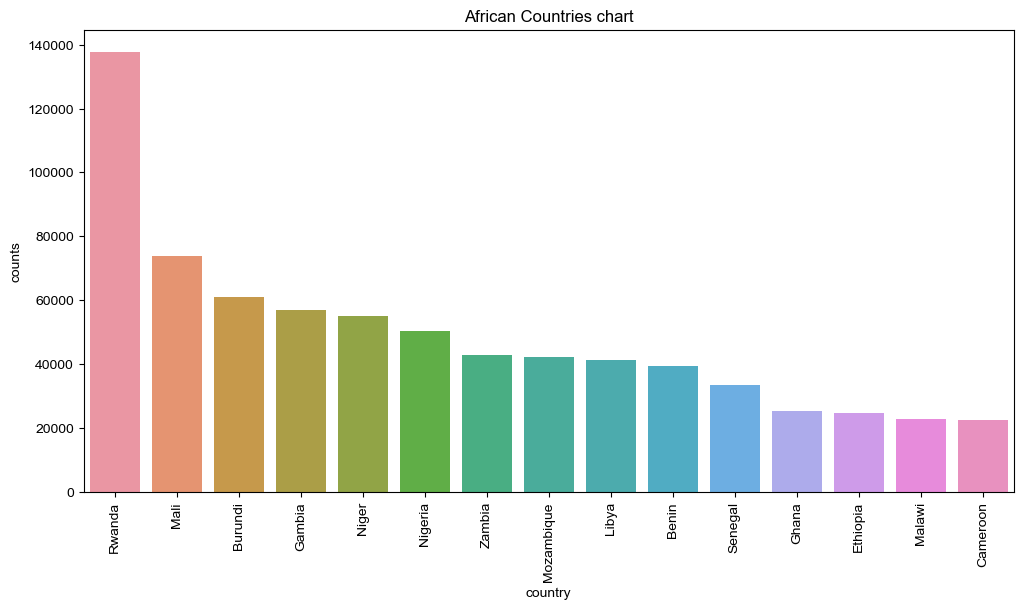

In [55]:
# visualize the information and break it down for the audience to understand it more better
plt.figure(figsize= (12,6))
plt.title('African Countries chart')
plt.xticks(rotation = 90)
sns.barplot(x= African_Countries.index, y= African_Countries)
sns.set_style('darkgrid')
plt.xlabel('country')
plt.ylabel('counts');

the chart above shows the Rwanda is the most effective country in regards to their marketing activites with a relative number close to 14,000
and the total number of african countries in the datasets is 42

# STATE

In [56]:
food.State.nunique()

485

In [57]:
African_State=food.State.value_counts().head(10)
African_State

North/Amajyaruguru            34770
South/Amajyepfo               31610
East/Iburasirazuba            30805
West/Iburengerazuba           30032
Yobe                          15671
Borno                         14512
Northern                      13971
Central River                 13535
North Bank                    11909
Kanifing Municipal Council    11548
Name: State, dtype: int64

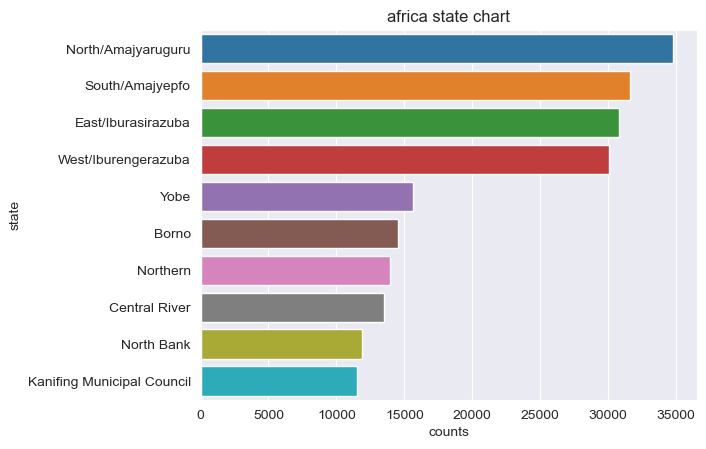

In [58]:
sns.set_style('darkgrid')
plt.title('africa state chart')
sns.barplot(x=African_State,y=African_State.index);
plt.ylabel('state')
plt.xlabel('counts');

from the chart above, the north/amajyaruguru, south amajyepfo 
and the esat/burasirazuba are the top three most visited african countries in relation to 
food and market activities

# PRODUCE

In [59]:
food.Produce.nunique()

457

In [60]:
production=food.Produce.value_counts().head(10)
production

Millet - Retail                  47476
Rice (imported) - Retail         47022
Sorghum - Retail                 44679
Maize - Retail                   43073
Maize (white) - Retail           33786
Rice (local) - Retail            31126
Groundnuts (shelled) - Retail    23221
Beans (dry) - Retail             16173
Beans (niebe) - Retail           15760
Rice - Retail                    15513
Name: Produce, dtype: int64

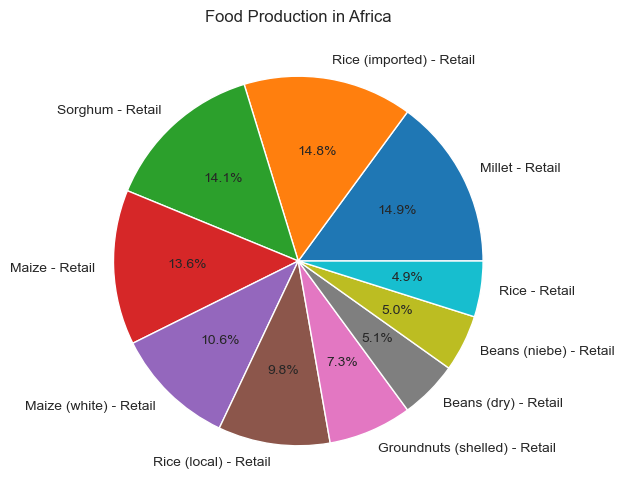

In [61]:
plt.figure(figsize=(12,6))
plt.title('Food Production in Africa')
plt.pie(production, labels=production.index, autopct= '%1.1f%%');

from the chart above, i am able to discover that the top three food produce in africa are 
millet_retail, rice(imported) retail and sorghym retail. it is very practical because in Nigeria,
most of the rice consumes by her citizens are imported rice
while the lowest of the food produce in africa is beans(dry and niebe)

# MARKET

In [62]:
food.Market.unique()

array(['Algiers', 'Tindouf', 'Samara', ..., 'Rutendo 6', 'Matibi',
       'Mbilashaba'], dtype=object)

In [63]:
food.Market.nunique()

1696

In [64]:
African_Market=food.Market.value_counts().head(10)
African_Market

Serrekunda          4130
Banjul              4127
Brikama             4111
Basse Santa su      4028
Farafenni           3937
Soma                3724
Bansang             3559
Kaur Wharf Town     3513
National Average    3446
Gasarenda           3022
Name: Market, dtype: int64

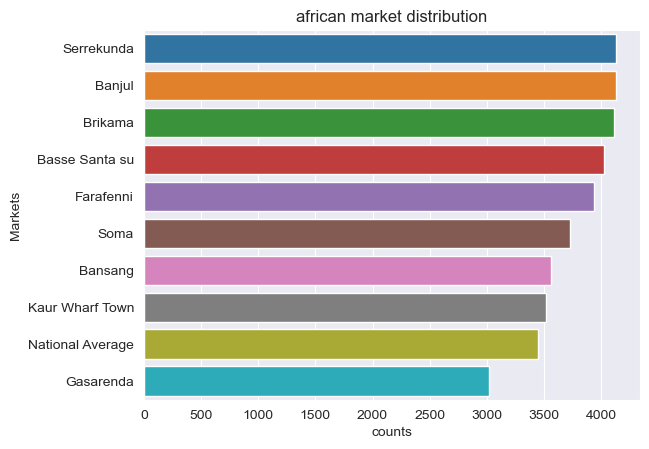

In [65]:
plt.title('african market distribution')
sns.barplot(x=African_Market,y=African_Market.index)
plt.ylabel('Markets')
plt.xlabel('counts');

the chart above shows that there is a close range in the top four
(serekunda, banjul, brikama, basse santa su)market of a value greater than 4000

# PRICE

In [66]:
food.Price.nunique()

108546

In [67]:
food.Price.unique()

array([  90.    ,   96.    ,   83.    , ...,   99.6333,  147.6666,
       1123.3333])

In [68]:
African_Price=food.Price.value_counts().head(15)>1000
African_Price

200.0     True
500.0     True
300.0     True
400.0     True
250.0     True
100.0     True
350.0     True
50.0      True
1000.0    True
150.0     True
600.0     True
450.0     True
700.0     True
175.0     True
225.0     True
Name: Price, dtype: bool

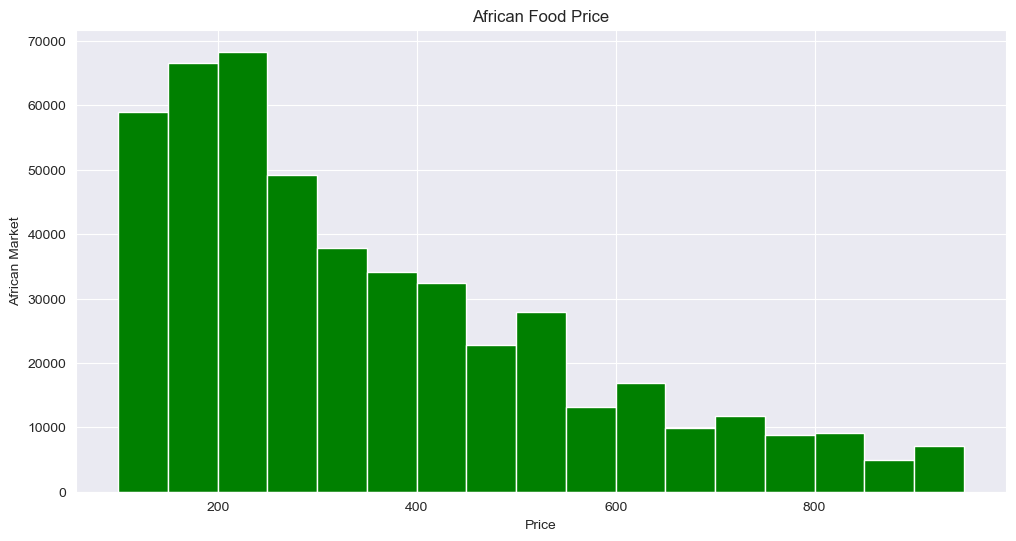

In [69]:
plt.figure(figsize=(12, 6))
plt.title('African Food Price')
plt.hist(food.Price, bins=np.arange(100, 1000, 50), color = 'green')
plt.ylabel('African Market')
plt.xlabel('Price')
plt.show()

the chart shows that the highest of the african market falls between 0 to 400 from the datasets given

# CHECKING THE RELATIONSHIP BETWEEN SOME SUBSETS FROM THE DATASETS

# ASKING AND ANSWERING QUESTION

### Q1. WHICH WERE THE MOST HIGHEST OR POPULAR PRODUCE IN THE AFRICAN DISTRIBUTION MARKET

In [70]:
filter_food = food[food['Produce'] != 'other']
filter_food.head()

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0


In [71]:
grouped_food = filter_food.groupby('Produce')
grouped_food.first()

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price
Produce,,,,,,,,,,,,,,,
Apples (red) - Retail,90.0,Gambia,1285,Central River,279,Bansang,229,GMD,15,Retail,5,KG,9,2013,43.7600
Apples - Retail,4.0,Algeria,344,Alger,1794,Algiers,345,DZD,15,Retail,5,KG,4,2015,140.0000
Avocados - Retail,43.0,Burundi,40542,Bubanza,1827,Musenyi,454,BIF,15,Retail,5,KG,10,2014,332.3333
Bananas (imported) - Retail,105.0,Guinea-Bissau,1388,Cacheu,3105,Cacheu,803,XOF,15,Retail,5,KG,5,2020,900.0000
Bananas (local) - Retail,105.0,Guinea-Bissau,1385,Bafata,1922,Kirintim,707,XOF,15,Retail,5,KG,7,2020,500.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yam (yellow) - Retail,29.0,Benin,609,Alibori,2771,Karimama,763,XOF,15,Retail,5,KG,4,2020,325.0000
Yam - Retail,29.0,Benin,609,Alibori,1044,Malanville (CBM),99,XOF,15,Retail,5,KG,7,2019,270.0000
Yam - Wholesale,94.0,Ghana,1324,Ashanti,215,Kumasi,99,GHS,14,Wholesale,128,250 KG,1,2006,63.3800


In [72]:
food_count = grouped_food.size()
food_count

Produce
Apples (red) - Retail          1497
Apples - Retail                  80
Avocados - Retail              3323
Bananas (imported) - Retail      15
Bananas (local) - Retail        399
                               ... 
Yam (yellow) - Retail            64
Yam - Retail                   3037
Yam - Wholesale                2670
Yogurt - Retail                 240
Zucchini - Retail              1523
Length: 457, dtype: int64

In [73]:
table1=food_count.reset_index(name='counts')
table1

,Produce,counts
0,Apples (red) - Retail,1497
1,Apples - Retail,80
2,Avocados - Retail,3323
3,Bananas (imported) - Retail,15
4,Bananas (local) - Retail,399
...,...,...
452,Yam (yellow) - Retail,64
453,Yam - Retail,3037
454,Yam - Wholesale,2670
455,Yogurt - Retail,240


In [74]:
table1 = table1.sort_values(by = 'counts', ascending = False)

In [75]:
table1.head(15)

,Produce,counts
256,Millet - Retail,47476
333,Rice (imported) - Retail,47022
387,Sorghum - Retail,44679
204,Maize - Retail,43073
199,Maize (white) - Retail,33786
337,Rice (local) - Retail,31126
162,Groundnuts (shelled) - Retail,23221
14,Beans (dry) - Retail,16173
27,Beans (niebe) - Retail,15760
357,Rice - Retail,15513


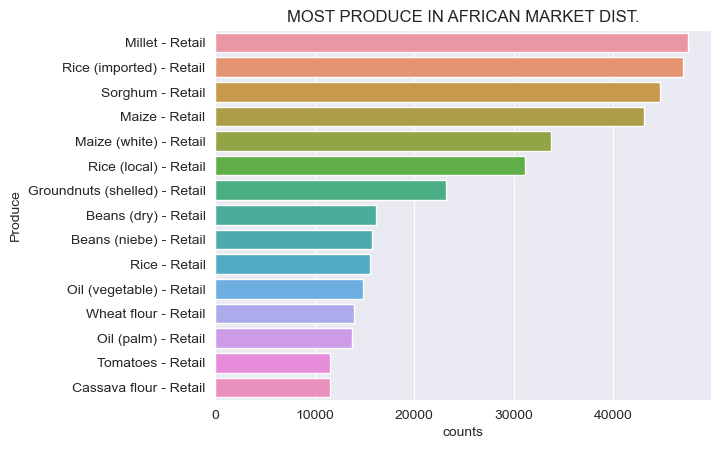

In [76]:
plt.title('MOST PRODUCE IN AFRICAN MARKET DIST.')
sns.barplot(data=table1.head(15), x='counts', y= 'Produce');

Millet-Retail is the most Food_produce produced in the whole of africa

# Q2. WHICH AMONGST THE PRODUCE HAS THE HIGHEST PRICE IN THE DATASETS

change the price to a centralise monetray system, its impossible to pick the currency out one by one 
by plotting the currency price to visualize

In [77]:
food.Currency

0         DZD
1         DZD
2         DZD
3         DZD
4         DZD
         ... 
956774    ZWL
956775    ZWL
956776    ZWL
956777    ZWL
956778    ZWL
Name: Currency, Length: 956779, dtype: object

In [78]:
# i assume that the rate of dollar in the africa international market is 720 
food['Price_USD'] = food['Price']*720

In [79]:
food.Price_USD

0          64800.000
1          69120.000
2          69120.000
3          59760.000
4          57600.000
             ...    
956774    167999.976
956775     81000.000
956776     82080.000
956777     42840.000
956778    864000.000
Name: Price_USD, Length: 956779, dtype: float64

In [80]:
# verify the new column (price_usd)
food

,Country_ID,Country,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Um_Unit_ID,Quantity,Month,Year,Price,Price_USD
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0000,64800.000
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0000,69120.000
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0000,69120.000
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0000,59760.000
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0000,57600.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,ZWL,15,Retail,5,KG,6,2021,233.3333,167999.976
956775,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,ZWL,15,Retail,116,100 ML,6,2021,112.5000,81000.000
956776,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,ZWL,15,Retail,5,KG,6,2021,114.0000,82080.000
956777,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,ZWL,15,Retail,66,250 G,6,2021,59.5000,42840.000


In [81]:
cols_to_keep = ['Produce','Price','Price_USD']
food[cols_to_keep]

,Produce,Price,Price_USD
0,Rice - Retail,90.0000,64800.000
1,Rice - Retail,96.0000,69120.000
2,Rice - Retail,96.0000,69120.000
3,Rice - Retail,83.0000,59760.000
4,Rice - Retail,80.0000,57600.000
...,...,...,...
956774,Beans (sugar) - Retail,233.3333,167999.976
956775,Toothpaste - Retail,112.5000,81000.000
956776,Laundry soap - Retail,114.0000,82080.000
956777,Handwash soap - Retail,59.5000,42840.000


In [82]:
african_food_price=food[cols_to_keep]

In [83]:
african_food_price = african_food_price.sort_values(by='Price', ascending=False)

In [84]:
african_food_price.head(10)

,Produce,Price,Price_USD
852171,Meat (camel) - Retail,17250000.0,1.242000e+10
852179,Meat (camel) - Retail,17200000.0,1.238400e+10
852184,Meat (camel) - Retail,17000000.0,1.224000e+10
852181,Meat (camel) - Retail,17000000.0,1.224000e+10
852180,Meat (camel) - Retail,17000000.0,1.224000e+10
852178,Meat (camel) - Retail,17000000.0,1.224000e+10
852177,Meat (camel) - Retail,17000000.0,1.224000e+10
852176,Meat (camel) - Retail,17000000.0,1.224000e+10
852175,Meat (camel) - Retail,17000000.0,1.224000e+10
852174,Meat (camel) - Retail,17000000.0,1.224000e+10


<Axes: xlabel='Produce', ylabel='Price_USD'>

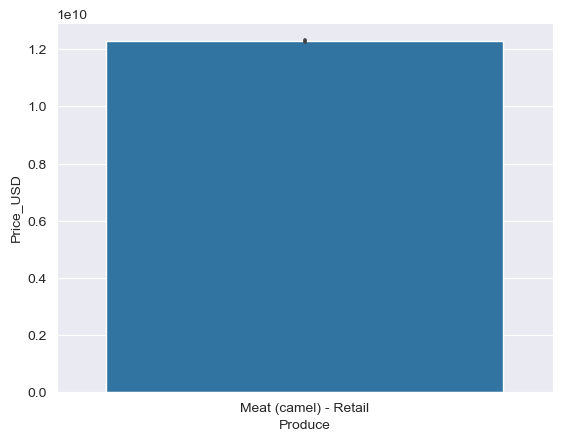

In [85]:
sns.barplot(data=african_food_price.head(10), x= 'Produce', y = 'Price_USD')

the highest price in the produce is the Meat(camel)-Retail Produce

# Q3. WHAT COUNTRY HAD THE MOST FOOD SUPPLY

In [86]:
most_food = food.groupby('Country')[['Produce']].count()

In [87]:
most_food = most_food.sort_values(by = 'Produce', ascending = False)

In [88]:
most_food.head(15)

,Produce
Country,
Rwanda,137746
Mali,73843
Burundi,60921
Gambia,56971
Niger,54974
Nigeria,50285
Zambia,42793
Mozambique,42278
Libya,41207


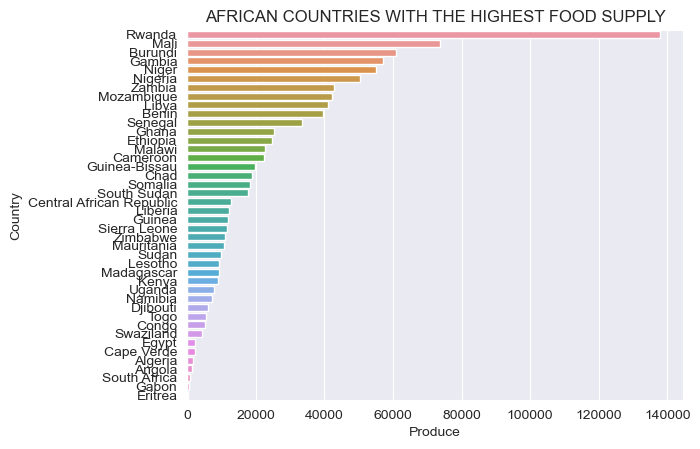

In [89]:
plt.title('AFRICAN COUNTRIES WITH THE HIGHEST FOOD SUPPLY')
sns.barplot(x=most_food.Produce, y= most_food.index, data = most_food)
plt.show()

i am able to visualize that the top 3 countries that supply the highest food in the international market are
RWANDA, MALI, BURUNDI respectively

# Q4. IN THE AFRICAN MARKET DISTRIBUTION ARE THEY MAKING PROFIT OR LOSS IN THE FOOD DATASETS

In [90]:
most_price = food.groupby('Year')[['Price']].count()

In [91]:
most_price

,Price
Year,
1990,140
1991,134
1992,148
1993,152
1994,843
1995,924
1996,1045
1997,1065
1998,1224


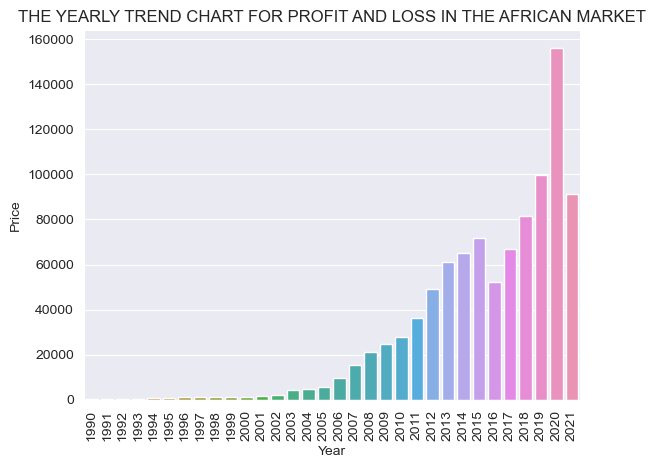

In [92]:
plt.title('THE YEARLY TREND CHART FOR PROFIT AND LOSS IN THE AFRICAN MARKET')
sns.barplot(x=most_price.index,y='Price', data = most_price)
plt.xticks(rotation = 90);

I am able to discover from the chart that, 
the price of the product in the market goes up in each year and the most climax range occur in the year 2021
and then deflation of prices occur in 2021.
so therefore they are making profits

# CONCLUSION:
The analysis shows that the most sales, profits and also 
the most food produce was recorded during the internationa market.
The data shows a lot of information were massive profits were made,the most food supply,
the price data, the most active country in the markets.
both the retail and wholesales trade system played a major role in the international markets.
as a results of the data, it shows that
### Rwanda is the most effective country during the international market
### it also shows that the top 3 food produce in africa were the millet(retail) 14.9%, 
### rice imported(retail)14.8% and the sorghum retail 14.1%.
### Rwanda also has the most food supply thereby making the international market grows well over the year
### And moreso, the price visualization show us the the market is growing and improving fast but there is a fluctuation that start around the year 2016-2021 and i strongly think it can be corrected when all the african countries gathered and put more effort to achieve the common goal

# RECOMMENDATION
I'd reccommend that some of the african countries with the largest country like egypyt, nigeria and the likes
should play a major role in the markets in other to make the speed of the growth of the market fast and reliable